<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

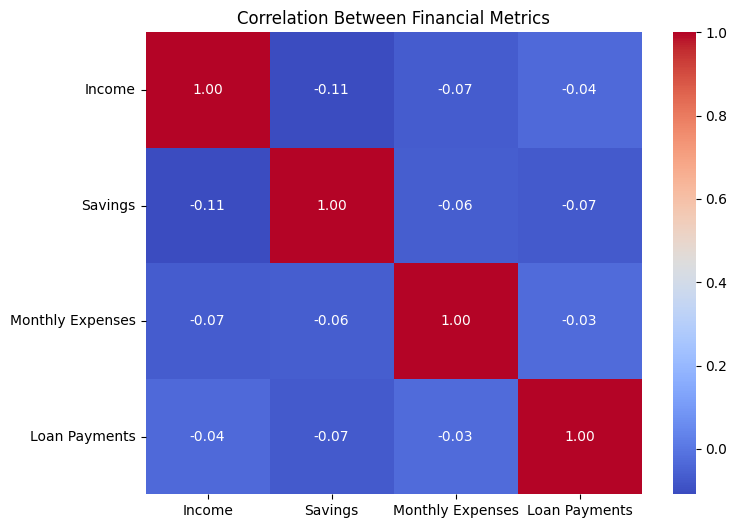

C:\Users\DELINA JOYCE\AppData\Local\Temp\ipykernel_3340\1130226376.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=member_summary, x='Member ID', y='Total Spending', palette='Blues_d')


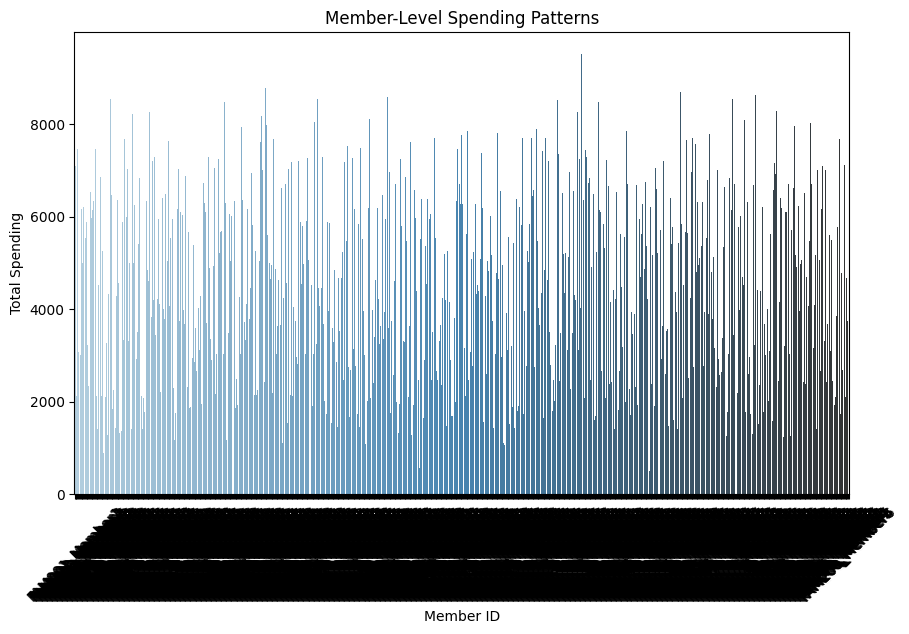

C:\Users\DELINA JOYCE\AppData\Local\Temp\ipykernel_3340\1130226376.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=member_summary, x='Member ID', y='Avg Spending Per Transaction', palette='Greens_d')


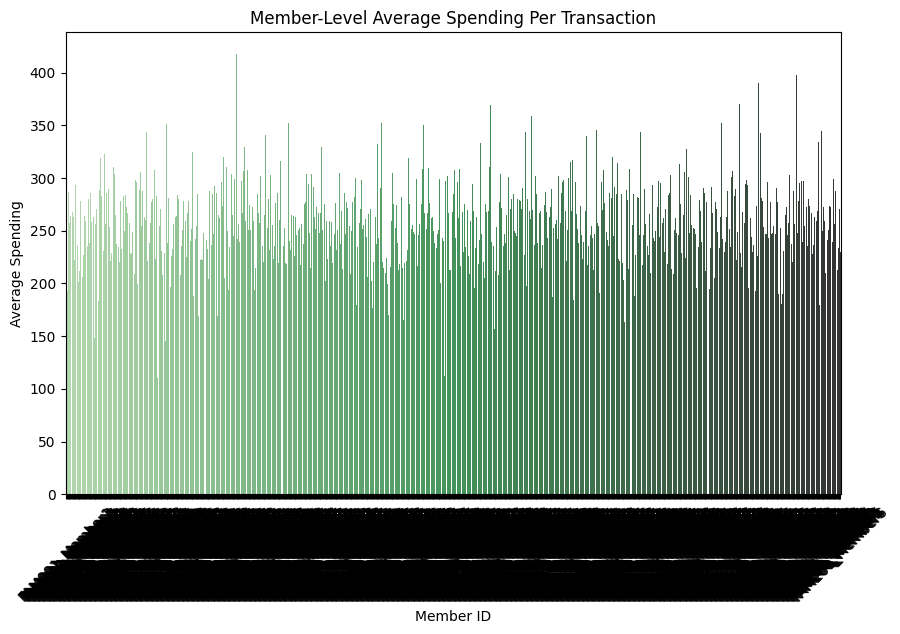

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:/Internshala/family_financial_and_transactions_data.xlsx'
data = pd.ExcelFile(file_path)

# Load the specific sheet
df = data.parse('final_family_financial_and_tran')

# Preview the dataset
print(df.info())
print(df.head())

# Aggregating family-level data
family_summary = df.groupby('Family ID').agg({
    'Amount': ['sum', 'mean', 'count'],  # Total, average, and count of transactions
    'Income': 'mean',
    'Savings': 'mean',
    'Monthly Expenses': 'mean',
    'Loan Payments': 'mean',
    'Credit Card Spending': 'mean',
    'Financial Goals Met (%)': 'mean',
})
family_summary.columns = ['Total Spending', 'Avg Spending Per Transaction', 'Transaction Count',
                          'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
                          'Credit Card Spending', 'Financial Goals Met (%)']
family_summary.reset_index(inplace=True)

# Aggregating member-level data
member_summary = df.groupby('Member ID').agg({
    'Amount': ['sum', 'mean', 'count'],  # Total, average, and count of transactions
    'Income': 'mean',
    'Savings': 'mean',
    'Monthly Expenses': 'mean',
    'Loan Payments': 'mean',
    'Credit Card Spending': 'mean',
})
member_summary.columns = ['Total Spending', 'Avg Spending Per Transaction', 'Transaction Count',
                          'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
                          'Credit Card Spending']
member_summary.reset_index(inplace=True)

# Calculate correlations
corr_matrix = family_summary[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Financial Metrics')
plt.show()


# Visualize member-level spending patterns
plt.figure(figsize=(10, 6))
sns.barplot(data=member_summary, x='Member ID', y='Total Spending', palette='Blues_d')
plt.title('Member-Level Spending Patterns')
plt.xlabel('Member ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=member_summary, x='Member ID', y='Avg Spending Per Transaction', palette='Greens_d')
plt.title('Member-Level Average Spending Per Transaction')
plt.xlabel('Member ID')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Calculate financial score for each family
def calculate_financial_score(row):
    score = 100
    
    # Factor 1: Savings-to-Income Ratio
    savings_to_income_ratio = row['Savings'] / row['Income']
    if savings_to_income_ratio < 0.1:
        score -= 20  # Penalty for low savings-to-income ratio
    
    # Factor 2: Monthly Expenses as a Percentage of Income
    expenses_percentage = row['Monthly Expenses'] / row['Income']
    if expenses_percentage > 0.5:
        score -= 15  # Penalty for high monthly expenses ratio
    
    # Factor 3: Loan Payments as a Percentage of Income
    loan_percentage = row['Loan Payments'] / row['Income']
    if loan_percentage > 0.3:
        score -= 15  # Penalty for high loan payments ratio
    
    # Factor 4: Credit Card Spending Trends
    if row['Credit Card Spending'] > 0.3 * row['Income']:
        score -= 10  # Penalty for high credit card spending
    
    # Factor 5: Financial Goals Met
    if row['Financial Goals Met (%)'] < 50:
        score -= 10  # Penalty for not meeting financial goals
    
    # Factor 6: Spending Category Distribution (Travel/Entertainment)
    score -= category_spending_penalty(row)  # Deduct points if high travel/entertainment spending
    
    return max(score, 0)  # Ensure score doesn't go below 0

# Spending category penalty logic
def category_spending_penalty(row):
    # Define the categories that affect the score (e.g., Travel, Entertainment)
    travel_entertainment_categories = ['Travel', 'Entertainment']
    category_spending = df[(df['Category'].isin(travel_entertainment_categories)) & (df['Family ID'] == row['Family ID'])]
    total_spent_in_category = category_spending['Amount'].sum()
    
    # Apply a penalty if more than 30% of monthly expenses are spent on these categories
    if total_spent_in_category > row['Monthly Expenses'] * 0.3:
        return 10  # Deduct 10 points if high spending on travel/entertainment
    
    return 0  # No penalty if spending is not excessive

# Apply the financial score function to each family
family_summary['Financial Score'] = family_summary.apply(calculate_financial_score, axis=1)

# Preview the family summary with the financial scores
print(family_summary[['Family ID', 'Financial Score']].head())



  Family ID  Financial Score
0    FAM001               90
1    FAM002               90
2    FAM003               90
3    FAM004               90
4    FAM005               70


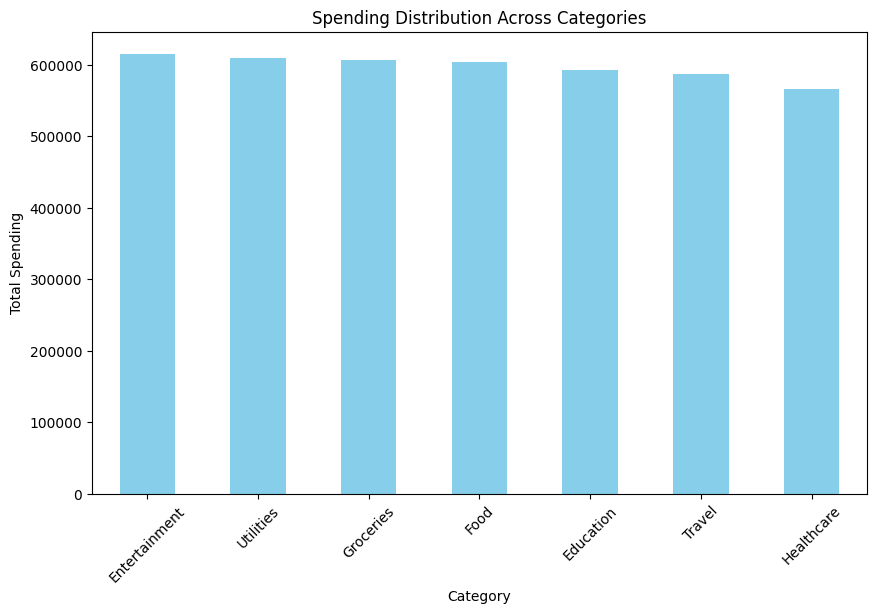

C:\Users\DELINA JOYCE\AppData\Local\Temp\ipykernel_3340\2588667388.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_summary, x='Family ID', y='Financial Score', palette='viridis')


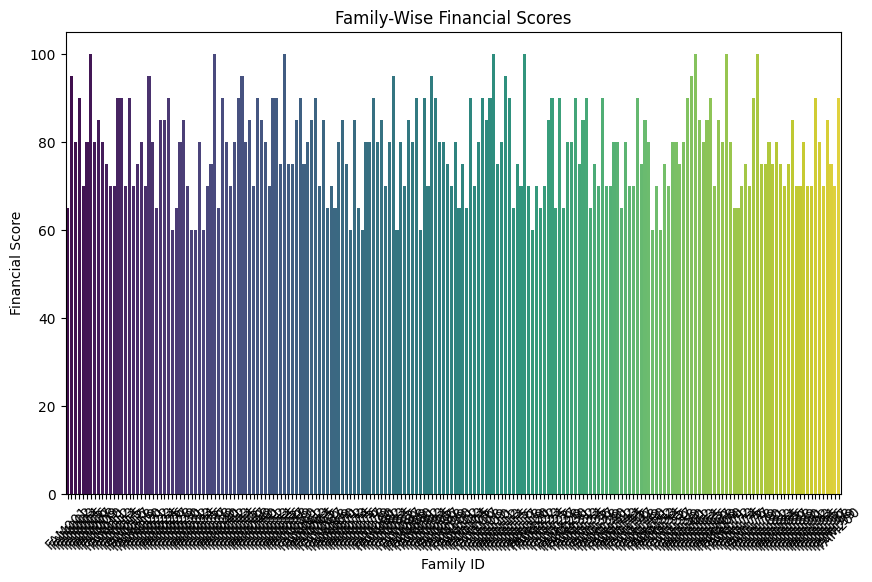

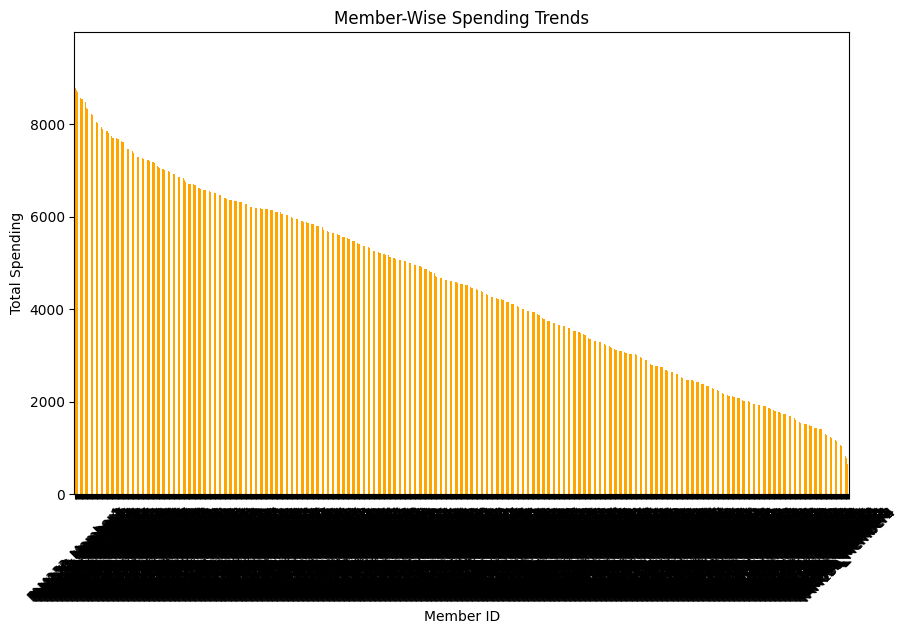

In [3]:
# Spending Distribution Across Categories
category_spending = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_spending.plot(kind='bar', color='skyblue')
plt.title('Spending Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

# Family-Wise Financial Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=family_summary, x='Family ID', y='Financial Score', palette='viridis')
plt.title('Family-Wise Financial Scores')
plt.xticks(rotation=45)
plt.show()

# Member-Wise Spending Trends
member_spending = df.groupby('Member ID')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
member_spending.plot(kind='bar', color='orange')
plt.title('Member-Wise Spending Trends')
plt.xlabel('Member ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()
